
 
<h1 style="font-size:35px;"><center>NLP BASED FAKE NEWS CLASSIFIER<center></h2>

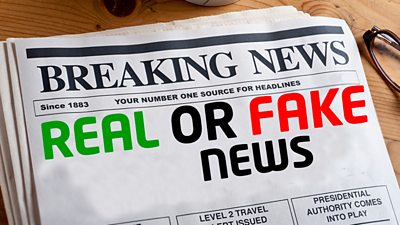

In [5]:
from IPython.display import Image
PATH = "/Users/mons/Desktop/"
Image(filename = PATH + "I-Newspaper2.jpeg", width=1200, height=1000)

<h2 style="color:orange;;">Problem Statement</h2>

<h3>The term fake news has become a buzz word these days.There was a time when if anyone needed any news, he or she would wait for the next-day newspaper. However, with the growth of online newspapers who update news almost instantly, people have found a better and faster way to be informed of the matter of his/her interest. Nowadays social-networking systems, online news portals, and other online media have become the main sources of news through which interesting and breaking news are shared at a rapid pace. However, many news portals serve special interest by feeding with distorted, partially correct, and sometimes imaginary news that is likely to attract the attention of a target group of people. Fake news has become a major concern for being destructive sometimes spreading confusion and deliberate disinformation among the people.<br>

The Aims of this projects is to use the Natural Language Processing and Machine learning to detect the Fake news based on the text content of the Article.And after building the suitable Machine learning model to detect the fake/true news then to deploye it into a web interface using python_Flask.</h3>


<h2 style="color:orange;">Importing Libraries</h2>

In [1]:
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashraf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashraf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


<h2 style="color:orange;;"> Dataset</h2>

In [3]:
Dataset = pd.read_csv("Dataset.csv")

In [4]:
Dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
Dataset.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


#### Encoding the column label 

In [6]:
Dataset["Article"] = Dataset1["title"] + Dataset1["text"]
Dataset.sample(frac = 1) #Shuffle 100%

Dataset.label[Dataset1.label == 'REAL'] = 1
Dataset.label[Dataset1.label == 'FAKE'] = 0

Dataset = Dataset1.loc[:,['Article','label']]
Dataset = Dataset1.dropna()

<ipython-input-6-586347da7020>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
<ipython-input-6-586347da7020>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0



<h2 style="color:orange;;"> DATA PREPROCESSING</h2>

<B>The cleaning will involve these steps-<BR>
1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more.<BR>
2.Remove all the numeric text, urls</B>

In [7]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [8]:
##  Applying the wordpre method to the dataset
Dataset['Article']=Dataset1['Article'].apply(wordpre)


<h2 style="color:orange;;">WORD CLOUD - REAL NEWS</h2>

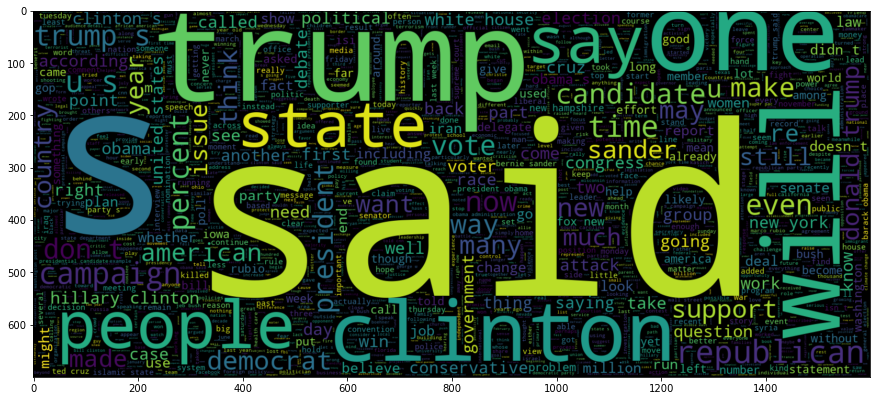

In [9]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

<h2 style="color:orange;;">WORD CLOUD - FAKE NEWS</h2>

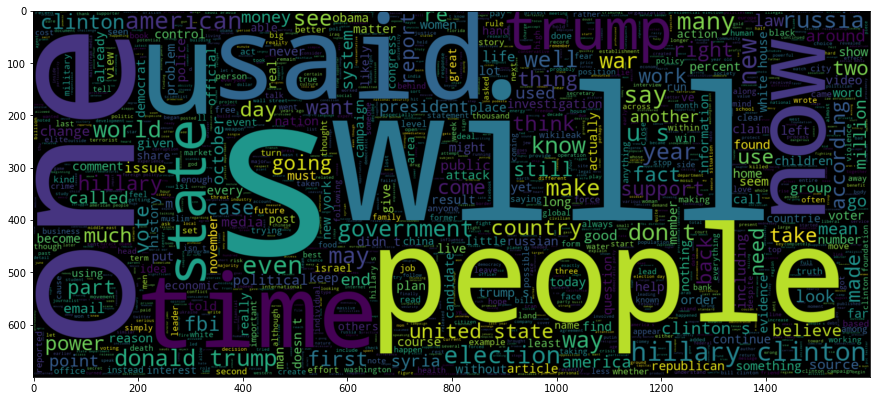

In [10]:
#word used in Fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [55]:
Dataset.shape

(76480, 2)


<h2 style="color:orange;;">Training the dataset</h2>

In [60]:
x_train,x_test,y_train,y_test = train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=2020)

In [61]:
x_train.shape

(61184,)

In [62]:
x_test.shape

(15296,)

In [64]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')


<h2 style="color:orange;;">LogisticRegression</h2>

In [65]:

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

Logisticmodel = pipe.fit(x_train, y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 87.04%


<h2 style="color:orange;;">DecisionTreeClassifier</h2>

In [66]:

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.07%


<h2 style="color:orange;;">RandomForestClassifier</h2>

In [67]:

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction = RandomForestmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.49%


<h2 style="color:orange;;"> Naive Bayes Classifier</h2>

In [71]:

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

MNBCmodel = pipe.fit(x_train, y_train)
prediction = MNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Multinomial_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 78.79%


<h3>RANDOM FOREST CLASSIFIER PERFORMED BETTER THAN THE OTHER MODELS WITH AN 82.49% ACCURACY AND THUS IS USED FOR DETECTION OF FAKE NEWS</h3>

In [77]:
import joblib  
# Save the model as a pickle in a file 
joblib.dump(Logisticmodel, 'model.pkl')  

['model.pkl']